# Lecture 6: Clustering Analysis

### A financial data example

1. The financial performance data from January 1981 issue of *Forbes*.

2. Table shows the data for 25 companies from three industries:
    - chemical companies (the first 14)
    - health care companies (15-19)
    - supermakert companies (20-25)

3. Background of these companies
    - Among the chemical companies, all of the large diversified firms were selected.
    - From the major supermarket chains, the top six rated for return on equity were included.
    - In the health care industry, four of the five companies included were those connected with hospital management; the remaining company involves hospital supplies and equipment (company 19).

In [6]:
# Import the data
import pandas as pd
# Graph plotting
import matplotlib.pyplot as plt
# Disable warnings
import warnings
warnings.filterwarnings('ignore')

In [8]:
Forbes = pd.read_csv('data/Cluster.csv')
Forbes.index += 1
Forbes.head()

,TYPE,SYMBOL,OBSNO,ROR5,DE,SALESGR5,EPS5,NPM1,PE,PAYOUTR1
1,Chem,dia,1,13.0,0.7,20.2,15.5,7.2,9,0.426398
2,Chem,dow,2,13.0,0.7,17.2,12.7,7.3,8,0.380693
3,Chem,stf,3,13.0,0.4,14.5,15.1,7.9,8,0.406780
4,Chem,dd,4,12.2,0.2,12.9,11.1,5.4,9,0.568182
5,Chem,uk,5,10.0,0.4,13.6,8.0,6.7,5,0.324544


<font color='red' size=5>Details of the variables</font>

- P/E: price-to-earnings ratio, which is the price of one share of common stock divided by the earnings per share for the last year. The ratio shows the dollar amount investors are willing to pay for the stock per dollar of current earnings of the company.

- ROR5: percent rate of return on total capital (invested plus debt) averaged over the past five years.

- D/E: debt-to-equity (invested capital) ratio for the last year. This ratio indicates the extent to which management is using borrowed funds to operate the company.

- SALESGR5: percent annual compound growth rate of sales, computed from the most recent five years compared with the previous five years.

- EPS5: percent annual compound growth in earnings per share, computed from the most recent five years compared with the previous five years.

- NPM1: percent net profit margin, which is the net profits divided by the net sales for the past year, expressed as a percentage.

- PAYOUTR1: annual dividend divided by the lastest 12-month earnings per share. 
    This value represents the proportion of earnings paid out to shareholders rather than to operate and expand the company.

### Standardizing the variables

In [9]:
# standardization of the continuous variables
X = Forbes.iloc[:, 3:].values
# import the function StandardScaler
from sklearn.preprocessing import StandardScaler
# fit_transform means to fit the model by the data and then transform the data by the fitted model
X_scaled = StandardScaler().fit_transform(X) 
# make is as the dataframe
X_d = pd.DataFrame(X_scaled, columns=['ROR5', 'DE', 'SALESGR5', 'EPS5', 'NPM1', 'PE', 'PAYOUTR1'], index= range(1, 26))

In [10]:
X_d.head()

,ROR5,DE,SALESGR5,EPS5,NPM1,PE,PAYOUTR1
1,0.982788,-0.007511,0.437915,0.283215,1.315877,-0.242222,0.153676
2,0.982788,-0.007511,0.051519,-0.058008,1.361314,-0.451035,-0.221020
3,0.982788,-0.570864,-0.296236,0.234469,1.633941,-0.451035,-0.007155
4,0.674221,-0.946433,-0.502314,-0.252993,0.497997,-0.242222,1.316042
5,-0.174341,-0.570864,-0.412155,-0.630776,1.088688,-1.077472,-0.681338


## Hierarchical clustering

In [11]:
# hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage

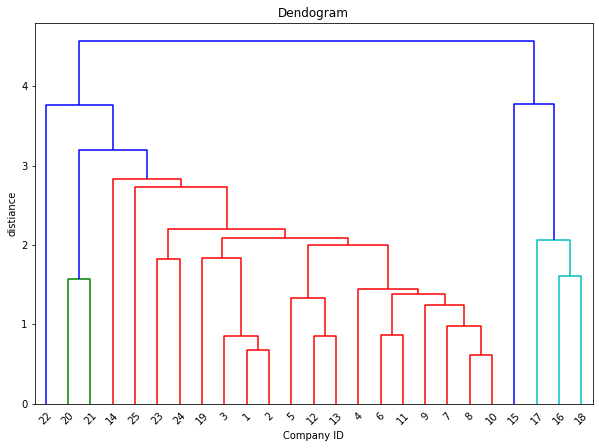

In [12]:
plt.figure(figsize=(10, 7))  
plt.title("Dendogram") 
Z = linkage(X_scaled, method='centroid', metric='euclidean')
dendrogram(Z, labels = range(1, len(X_scaled) + 1))
plt.xlabel('Company ID')
plt.ylabel('distiance')
plt.show()

### Analysis of the results

- Companies 1, 2, and 3 form a single cluster, where there are 22 clusters.

- At the opposite end, 15, 16, 17, and 18 form a single cluster at the step in which there are two clusters.

- Company 22 stays by itself until there are only four clusters.

#### Chemical companies

- 13 of the chemical companies, all except no. 14 (rci), are clustered together with only one non-chemical firm, company 19 (ahs), when the number of clusters is eight.

- The results are impressive when one considers that these are large diversified companies with varied emphasis, ranging from industrial chemicals to textiles to oil and gas production.

#### Hospitical management firms

- At the level of nine clusters, three of the four hospital management firms, companies 16, 17, and 18 (hca, nme, and ami) have been clustered together, and the other, company 15(hum), is added to that cluster before it is aggregated with any non-hospital management firms.

In [13]:
display(X_d.loc[15:19, :])

,ROR5,DE,SALESGR5,EPS5,NPM1,PE,PAYOUTR1
15,-0.482909,3.748173,2.962363,2.586473,0.679748,2.263527,-0.137514
16,-0.598621,0.368057,1.416782,1.258139,1.088688,2.472339,-2.019718
17,-0.791476,0.931410,2.820685,1.392191,0.270809,1.845902,-0.857712
18,-0.560050,0.743626,0.682632,1.063155,0.770624,1.845902,-0.855351
19,0.944217,-0.758648,-0.103039,0.368521,0.634311,0.801840,-0.985030


- From the data table, company 15 has clearly a different D/E value from others.

- The misfit in this health group is company 19, clustered with chemerical firms.

- In fact, company 19 is a large, established supplies and equipment firm.

#### Grocery firms

- The grocery firms does not cluster tightly.

In [14]:
display(X_d.loc[20:, :])

,ROR5,DE,SALESGR5,EPS5,NPM1,PE,PAYOUTR1
20,1.831350,-0.007511,-0.193198,-0.192060,-1.274074,-0.451035,1.568119
21,3.065621,-0.946433,-0.231837,-0.192060,-1.228636,-0.242222,1.399098
22,-0.212912,1.682547,-0.927349,1.355632,-1.501262,-0.868660,-1.743801
23,-0.212912,0.743626,0.141678,0.258842,-1.228636,-0.451035,-0.709818
24,-0.097199,-0.383080,-0.540953,0.587879,-1.546700,-0.868660,0.377756
25,-0.482909,0.555841,-0.669752,-1.057305,-1.592138,-0.659847,1.535622


- From the table, they vary substantially on most variables. Company 22 is highly leveraged (high DE) and company 21 has low leverage (low DE) relative to others.

- Import disparities:

1. Three of them, companies 21, 24, and 25 (win, ka, sa), are three of the four largest United States grocery supermarket chains.

2. Tow others, companies 20 and 22 (kls, sgl), have a diversified mix of grocery, drug, department, and other stores.

3. The remainin firm, company 23 (slc) concentrates on convenient stores (7-Eleven) and has a substantial franchising operation.

4. Thus, the six are quite different from each other.

Let us pick $K=3$ and run the hierarchical clustering model.

In sklearn, AgglomerativeClustering does not provide centroid linkage. We will try to use average linkage instead.

In [15]:
from sklearn.cluster import AgglomerativeClustering

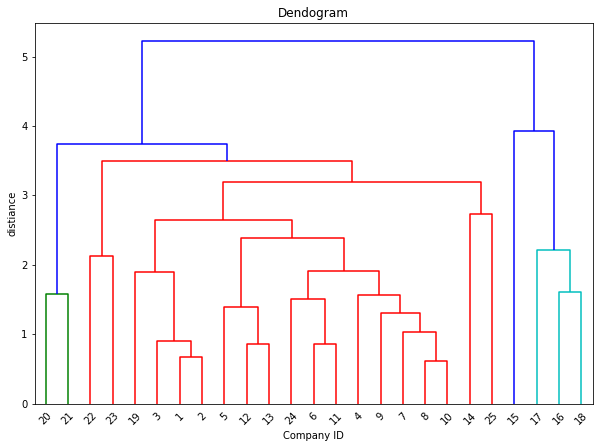

In [16]:
plt.figure(figsize=(10, 7))  
plt.title("Dendogram") 
Z = linkage(X_scaled, method='average', metric='euclidean')
dendrogram(Z, labels = range(1, len(X_scaled) + 1))
plt.xlabel('Company ID')
plt.ylabel('distiance')
plt.show()

In [17]:
hier = AgglomerativeClustering(n_clusters = 3, linkage = 'average', affinity = 'euclidean').fit(X_d)
hier_labels = hier.labels_
# sklearn does not provide centroid linkage.

In [18]:
print(hier_labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 1 0 0 0 0 0 0 0]


### Analysis of the results

- In AgglomerativeClustering, linkage corresponds to method and affinity corresponds to metric in linkage function provided by scipy.

- The result is different from that using centroid linkage. It is because the distance between clusters is different for different linkage. Therefore, the model merges different clusters together when using different linkage.

- However, the variation of the results is not too large. Most of the previous interpretation is coherent with the dendrogram when using average linkage.

## K-means

How to choose $k$? Use Elbow rule.

In [19]:
from sklearn.cluster import KMeans

In [20]:
wss = [ ]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X_d)
    wss.append(kmeans.inertia_)

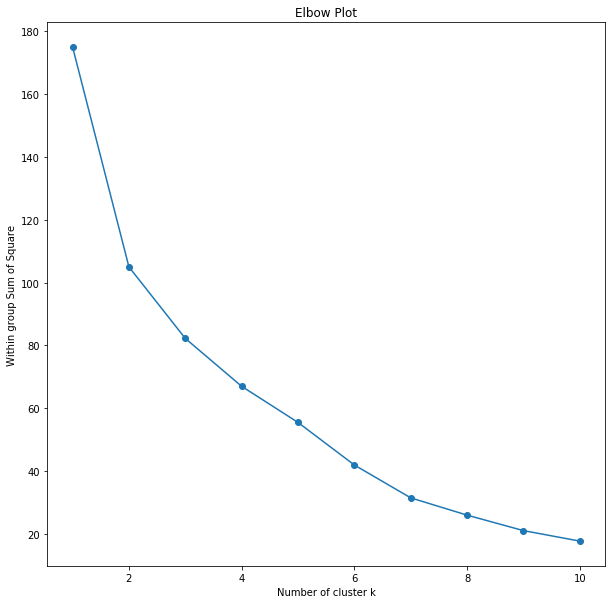

In [21]:
plt.figure(figsize=(10,10))
plt.plot(range(1, 11), wss, '-o')
plt.title('Elbow Plot')
plt.xlabel('Number of cluster k')
plt.ylabel('Within group Sum of Square')
plt.show()

Let us pick $K=3$ and run the $K$-means algorithm.

In [22]:
kmeans = KMeans(n_clusters=3, random_state=100)
kmeans.fit(X_scaled)
#print('Cluster membership:\n{}'.format(kmeans.labels_))
# or use the predict function
kmeans_labels = kmeans.predict(X_scaled)

In [23]:
print(kmeans_labels)

[1 1 1 1 2 2 2 2 2 2 2 2 2 2 0 0 0 0 1 1 1 2 2 2 2]


In [24]:
Forbes['kmeans_label'] = kmeans_labels
Forbes['hierarchical_label'] = hier_labels
Forbes[['TYPE', 'kmeans_label', 'hierarchical_label']]

,TYPE,kmeans_label,hierarchical_label
1,Chem,1,0
2,Chem,1,0
3,Chem,1,0
4,Chem,1,0
5,Chem,2,0
6,Chem,2,0
7,Chem,2,0
8,Chem,2,0
9,Chem,2,0
10,Chem,2,0
